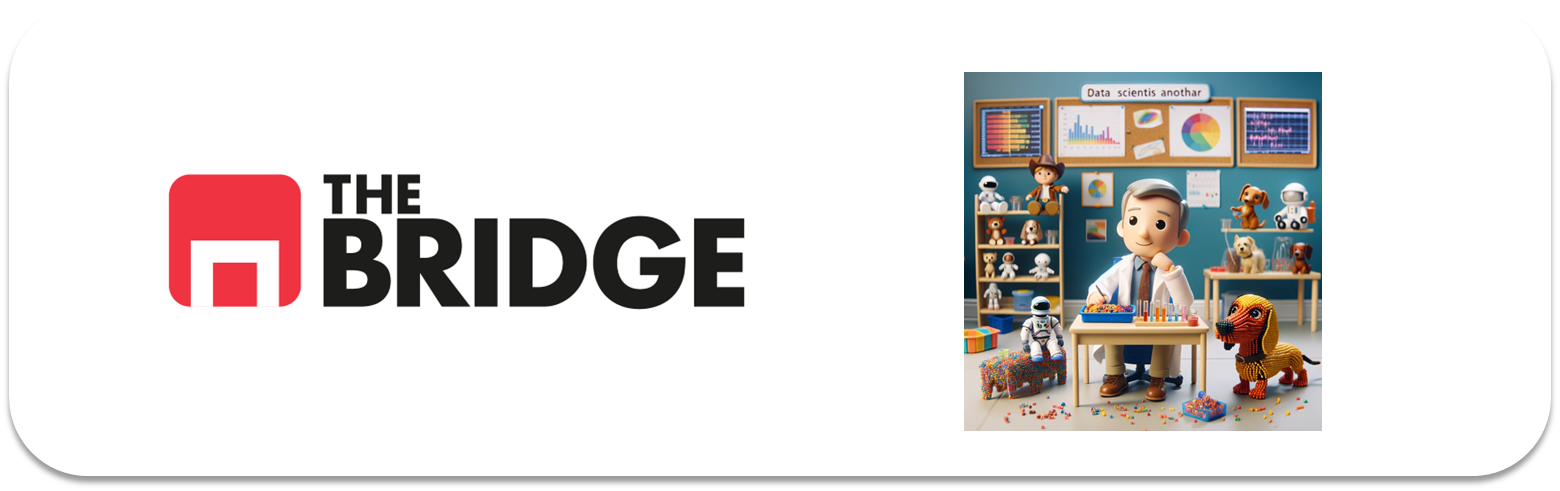

## PRACTICA OBLIGATORIA: ANÁLISIS UNIVARIANTE

* La práctica obligatoria de esta unidad consiste en hacer el análisis univariante completo de un dataset con el que acabarás muy familiarizado, el manifiesto de pasajeros del Titanic. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook. Te dejo una que vas a necesitar sí o sí

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from bootcampviztools import pinta_distribucion_categoricas, plot_categorical_relationship_fin, plot_categorical_numerical_relationship, plot_categorical_numerical_relationship, plot_combined_graphs, plot_grouped_boxplots, plot_grouped_histograms, grafico_dispersion_con_correlacion, bubble_plot

### #1 Preparación


### #1.1


Carga en un dataframe los datos del titanic a partir de un dataset de seaborn. Para ello:

* ejecuta ``` sns.get_dataset_names()```
* localiza el nombre que puede ser el adecuado para el ejercicio
* Asigna la salida de ```sns.load_dataset(<nombre_del_dataset>)``` a una variable "df_titanic"

In [4]:
sns.get_dataset_names()
df_titanic = sns.load_dataset("titanic")

### #1.2

Muestra una porción del dataset ("df_titanic") y su info general. ¿Hay nulos?

In [5]:
df_titanic.sample(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
789,0,1,male,46.00,0,0,79.2000,C,First,man,True,B,Cherbourg,no,True
124,0,1,male,54.00,0,1,77.2875,S,First,man,True,D,Southampton,no,False
78,1,2,male,0.83,0,2,29.0000,S,Second,child,False,NaN,Southampton,yes,False
762,1,3,male,20.00,0,0,7.2292,C,Third,man,True,NaN,Cherbourg,yes,True
447,1,1,male,34.00,0,0,26.5500,S,First,man,True,NaN,Southampton,yes,True
272,1,2,female,41.00,0,1,19.5000,S,Second,woman,False,NaN,Southampton,yes,False
253,0,3,male,30.00,1,0,16.1000,S,Third,man,True,NaN,Southampton,no,False
542,0,3,female,11.00,4,2,31.2750,S,Third,child,False,NaN,Southampton,no,False
233,1,3,female,5.00,4,2,31.3875,S,Third,child,False,NaN,Southampton,yes,False
872,0,1,male,33.00,0,0,5.0000,S,First,man,True,B,Southampton,no,True


In [6]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


*nulos en*
- age
- embarked
- deck
- embark_town (solo 2)

### #1.3

Obtén el porcentaje de nulos y decide que hacer con las columnas con nulos y ejecútalo. Además deshazte de la columna "parch" que no la emplearemos.

In [7]:
df_titanic.drop(columns="parch", inplace=True)

In [8]:
df_titanic.isna().sum()/len(df_titanic)*100

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

In [9]:
df_titanic.deck.value_counts()/len(df_titanic)*100

# muchos nulos, parece ser que los decks son las plantas de un barco

deck
C    6.621773
B    5.274972
D    3.703704
E    3.591470
A    1.683502
F    1.459035
G    0.448934
Name: count, dtype: float64

In [10]:
deck_distribution = df_titanic.groupby('class', observed=False)['deck'].value_counts()
deck_distribution

# irrelevante, me la quito

df_titanic.drop(columns="deck", inplace=True)

### #1.4
Sobre el dataset "limpio". Rellena la tabla de descripción (muy breve) de lo que es cada columna en función de su nombre y los valores. Para ayudarte:
* Se trata del dataset que reune lo más parecido a un manifiesto de supervivientes y fallecidos en el viaje.
* sibsp: Es el numero de familiares que viajan con la persona indicada en el manifiesto (lista de pasajeros)
* embarked: Es la incial de la letra de la ciudad donde embarcó la persona.




| Columna/Variable | Descripción |
| ---------------- | ----------- |
|survived|sobrevivio o no en binario
pclass|la clase en nums
sex|sexo del pasajero
age|edad del pasajero
sibsp|num de familiares que viajan con el pasajero
fare|precio del billete
embarked|inicial de la ciudad donde embarcó el pasajero
class|la clase donde viaja el pasajero
who|sexo del pasajero
adult_male|si se trata de un hombre de 16 años o más
embark_town|nombre de la ciudad donde embarcó el pasajero
alive|si sobrevivió yes o no
alone|si viaja solo (hay 310 alone = False y 243 sibsp > 0)



### #1.5

Busca en internet las tres ciudades que visitó el Titanic antes de poner rumbo a su destino y llegar a alta mar. Cambia las iniciales por esos valores.

In [11]:
df_titanic.drop(columns="embarked", inplace=True)
# ya existe la columna embark_town
df_titanic.rename(columns={"embark_town": "embarked"}, inplace=True)

### #2 Análisis

Sabiendo que el objetivo de nuestro análisis es hacer un estudio de la superviviencia y mortalidad en el viaje... Haz un análisis univariante completo y ordenado de las siguientes variables:  
["survived","who","age","fare","class","embarked","alone"]  
Nota: Si quieres añadir más, perfecto.

Separa el análisis en categóricas (incluyendo binarias) y numéricas. Muestra valores, gráficas y conclusiones/observaciones (2 o 3 por variable)

In [12]:
variables = ["survived","who","age","fare","class","embarked","alone"]
df_titanic[variables].describe()

,survived,age,fare
count,891.000000,714.000000,891.000000
mean,0.383838,29.699118,32.204208
std,0.486592,14.526497,49.693429
min,0.000000,0.420000,0.000000
25%,0.000000,20.125000,7.910400
50%,0.000000,28.000000,14.454200
75%,1.000000,38.000000,31.000000
max,1.000000,80.000000,512.329200


In [13]:
df = df_titanic[variables]
df_tipificacion = pd.DataFrame([df.nunique(), df.nunique()/len(df) * 100, df.dtypes]).T.rename(columns = {0: "Card", 1: "%_Card", 2: "Tipo"})

df_tipificacion["Clasificada_como"] = "Categorica"
df_tipificacion.loc[df_tipificacion.Card == 2, "Clasificada_como"] = "Binaria"
df_tipificacion.loc[df_tipificacion["Card"] > 10, "Clasificada_como"] ="Numerica Discreta"
df_tipificacion.loc[df_tipificacion["%_Card"] > 30, "Clasificada_como"] = "Numerica Continua"
df_tipificacion


,Card,%_Card,Tipo,Clasificada_como
survived,2,0.224467,int64,Binaria
who,3,0.3367,object,Categorica
age,88,9.876543,float64,Numerica Discreta
fare,248,27.833895,float64,Numerica Discreta
class,3,0.3367,category,Categorica
embarked,3,0.3367,object,Categorica
alone,2,0.224467,bool,Binaria


In [14]:
# en mi opinion fare es numerica continua
df_tipificacion.loc['fare', 'Clasificada_como'] = 'Numerica Continua'
df_tipificacion

,Card,%_Card,Tipo,Clasificada_como
survived,2,0.224467,int64,Binaria
who,3,0.3367,object,Categorica
age,88,9.876543,float64,Numerica Discreta
fare,248,27.833895,float64,Numerica Continua
class,3,0.3367,category,Categorica
embarked,3,0.3367,object,Categorica
alone,2,0.224467,bool,Binaria


### #2.1 Categóricas

In [68]:
lista_categoricas = ['survived', 'who', 'class', 'embarked', 'alone']
df_categoricas = df_titanic[df_tipificacion[df_tipificacion['Clasificada_como'].isin(['Binaria', 'Categorica'])].index]
df_categoricas["class"].value_counts()

class
Third     491
First     216
Second    184
Name: count, dtype: int64

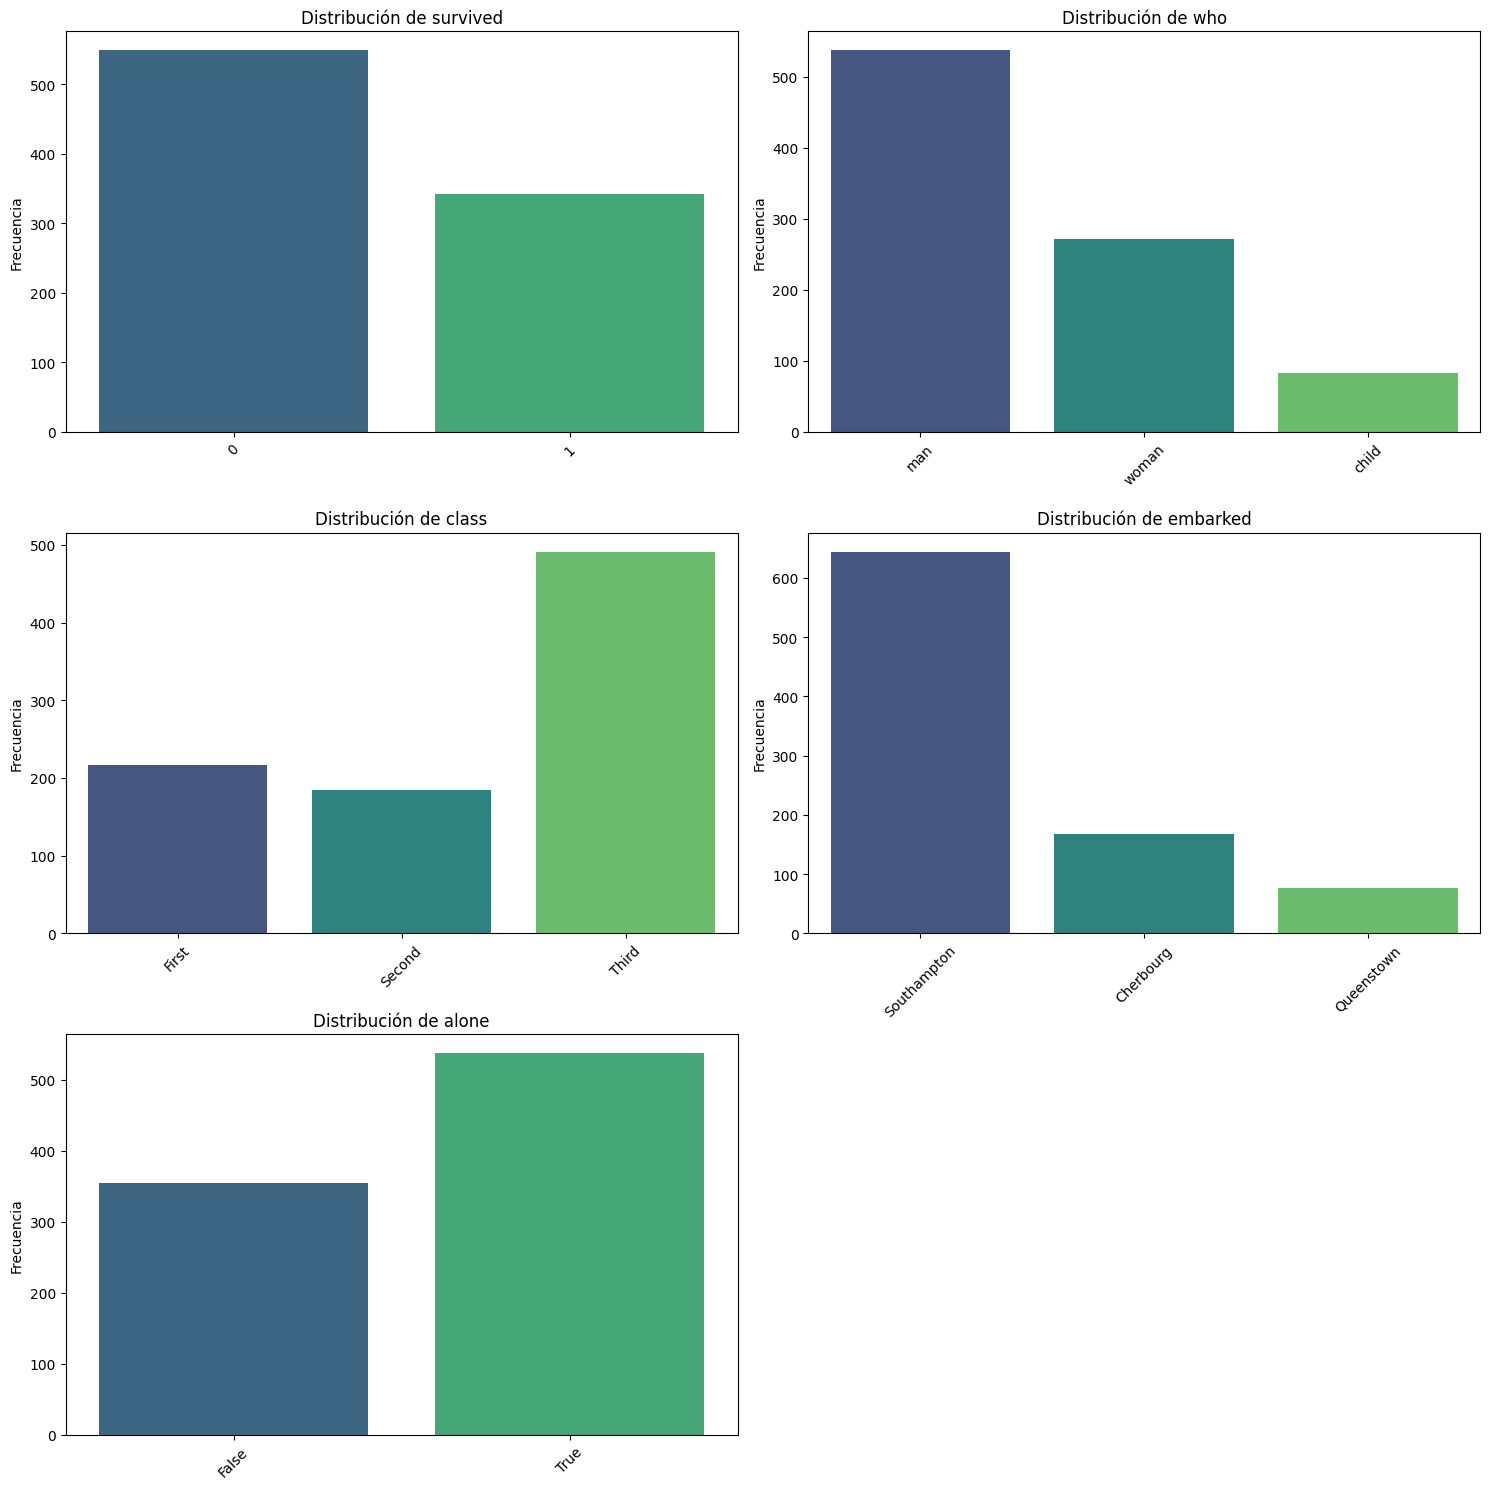

In [42]:
pinta_distribucion_categoricas(df_categoricas, lista_categoricas)

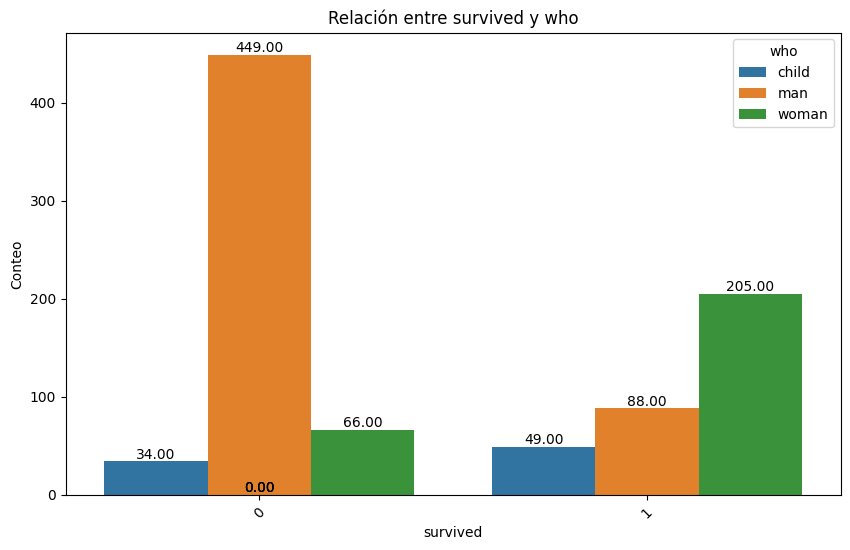

c:\Users\Nur\Documents\GitHub\online_ds_thebridge_Nur\ejercicios\03_Analisis_de_Datos\Sprint_07\Unidad_01\Practica_Obligatoria\bootcampviztools.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')


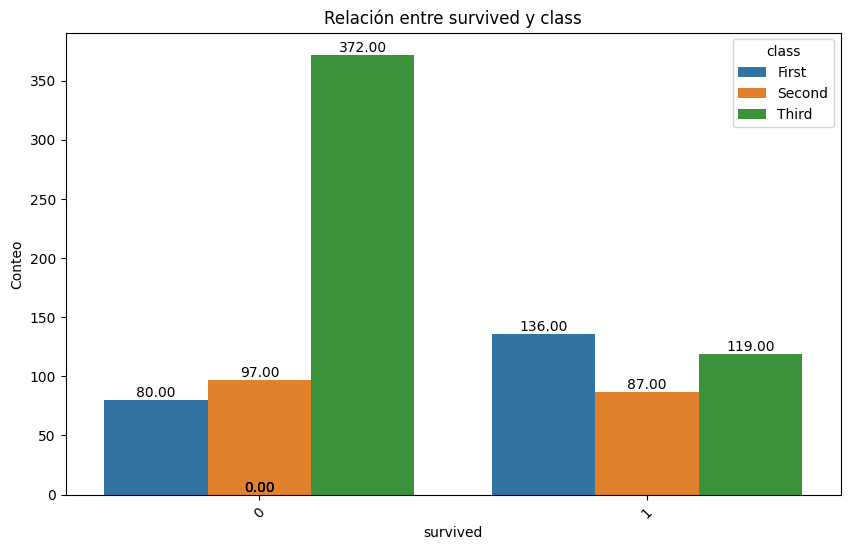

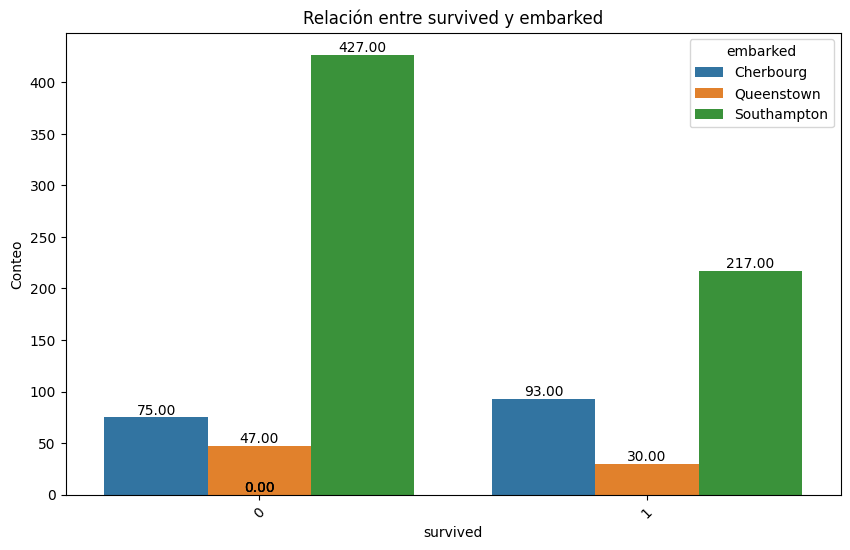

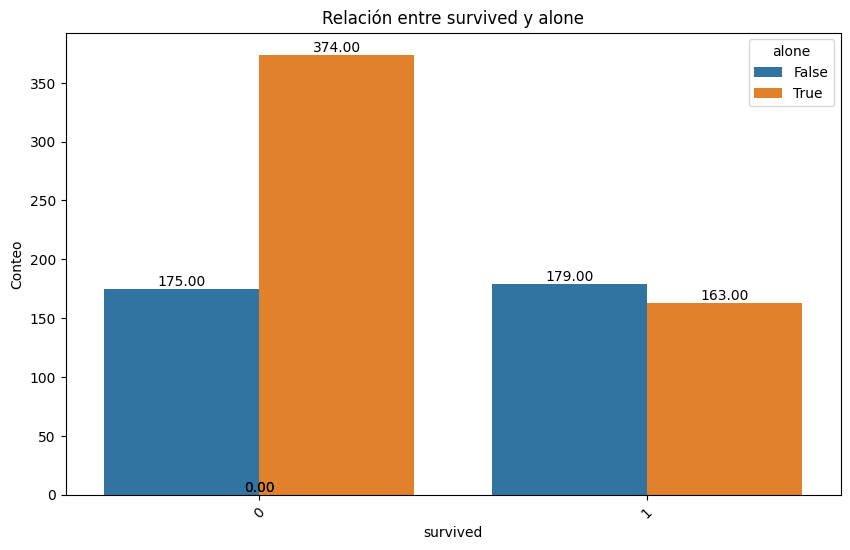

c:\Users\Nur\Documents\GitHub\online_ds_thebridge_Nur\ejercicios\03_Analisis_de_Datos\Sprint_07\Unidad_01\Practica_Obligatoria\bootcampviztools.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')


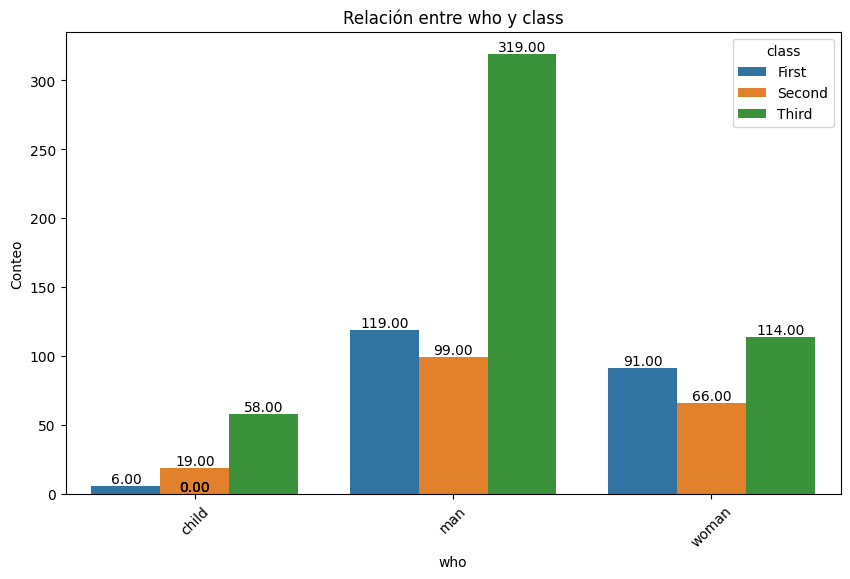

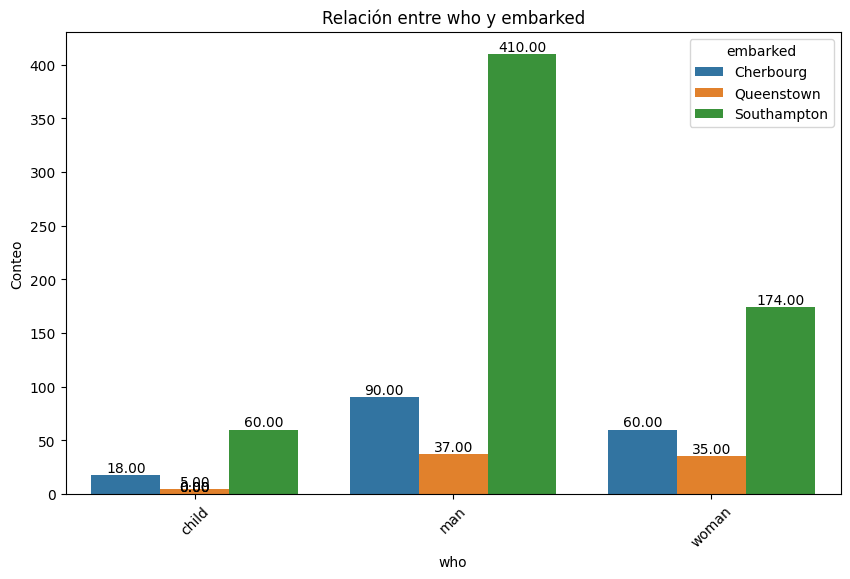

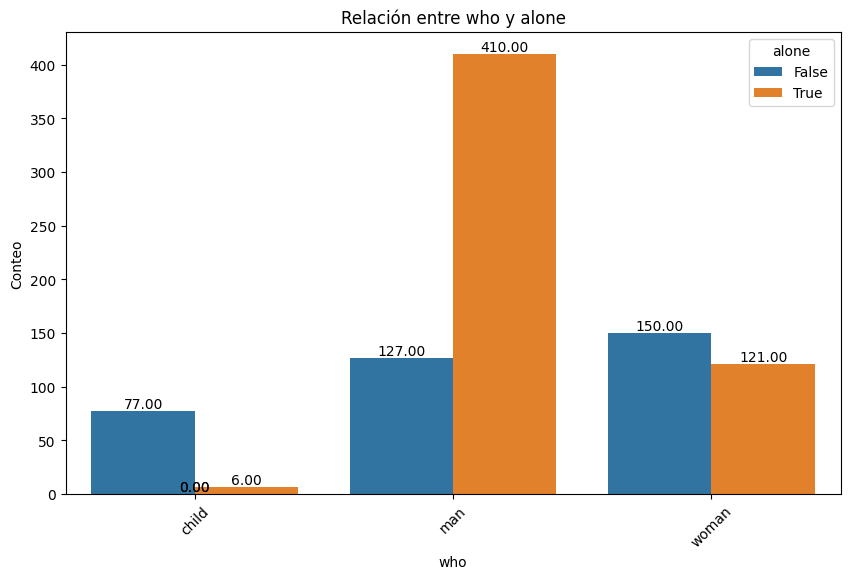

c:\Users\Nur\Documents\GitHub\online_ds_thebridge_Nur\ejercicios\03_Analisis_de_Datos\Sprint_07\Unidad_01\Practica_Obligatoria\bootcampviztools.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')


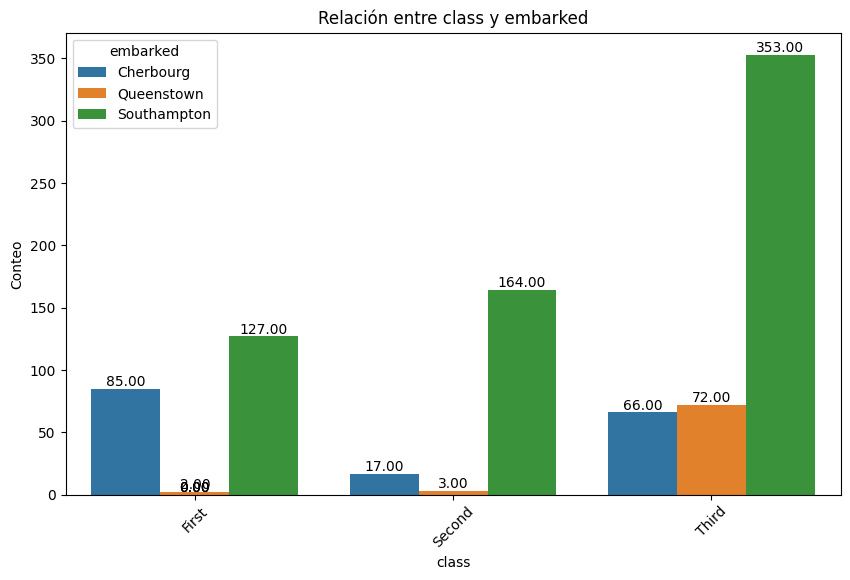

c:\Users\Nur\Documents\GitHub\online_ds_thebridge_Nur\ejercicios\03_Analisis_de_Datos\Sprint_07\Unidad_01\Practica_Obligatoria\bootcampviztools.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')


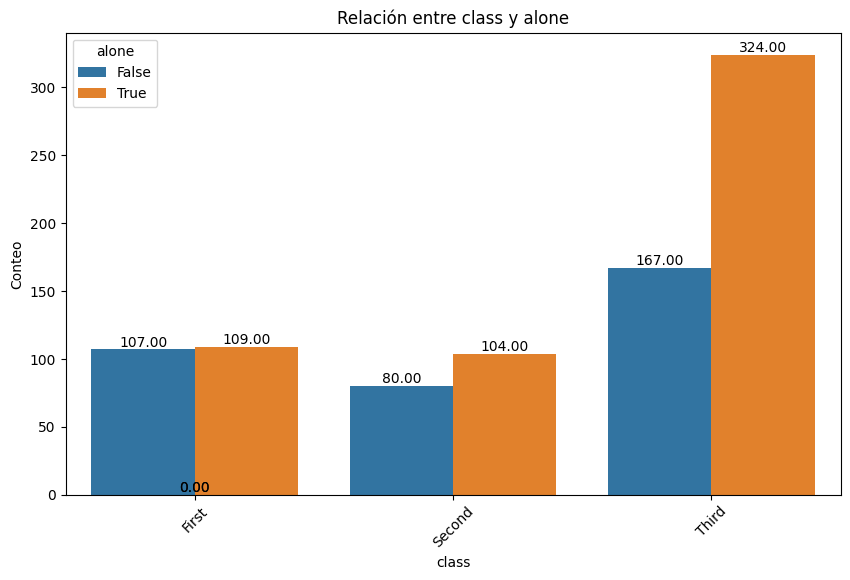

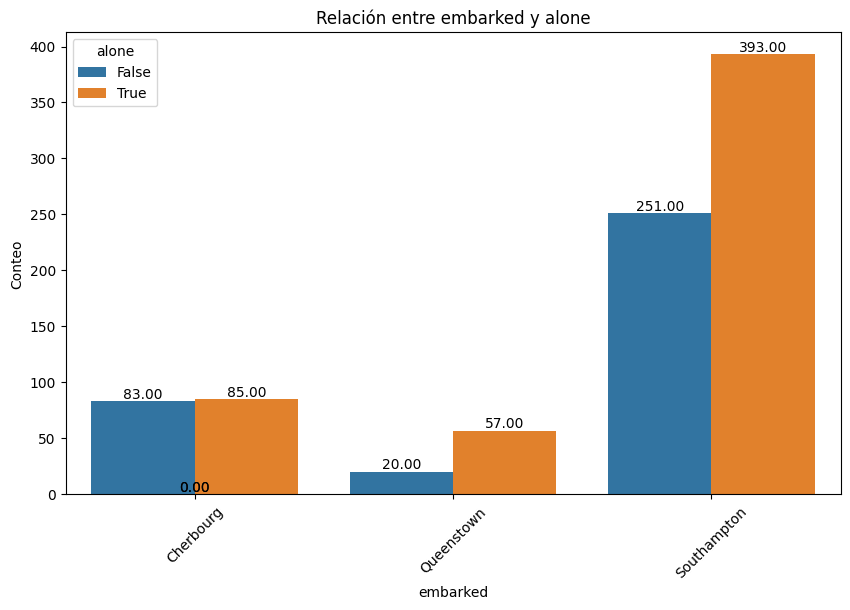

In [62]:
import itertools

combinaciones = list(itertools.combinations(lista_categoricas, 2))

for col1, col2 in combinaciones:
    plot_categorical_relationship_fin(df, col1, col2, show_values=True)


+ el principal perfil del pasajero era hombre de clase baja que embarcó en inglaterra que viajaba solo
+ la gran mayoria de los hombres murió y de las mujeres sobrevivió más o menos un 75%
+ murieron más pasajeros de 3rd class, la supervivencia esta bastante equlibrada pero sobrevivieron más de 1st class
+ la relacion entre supervivencia y puerto de embarco es bastante proporcional a la distribución de puertos
+ murió más gente que viajaba sola, pero también eran más y en supervivencia van a la par

*embarcaron 6 niños solos, curioso*

### #2.2 Numéricas

In [38]:
df_numericas = df_titanic[df_tipificacion[df_tipificacion['Clasificada_como'].isin(['Numerica Discreta', 'Numerica Continua'])].index]
lista_numericas = ['age', 'fare']

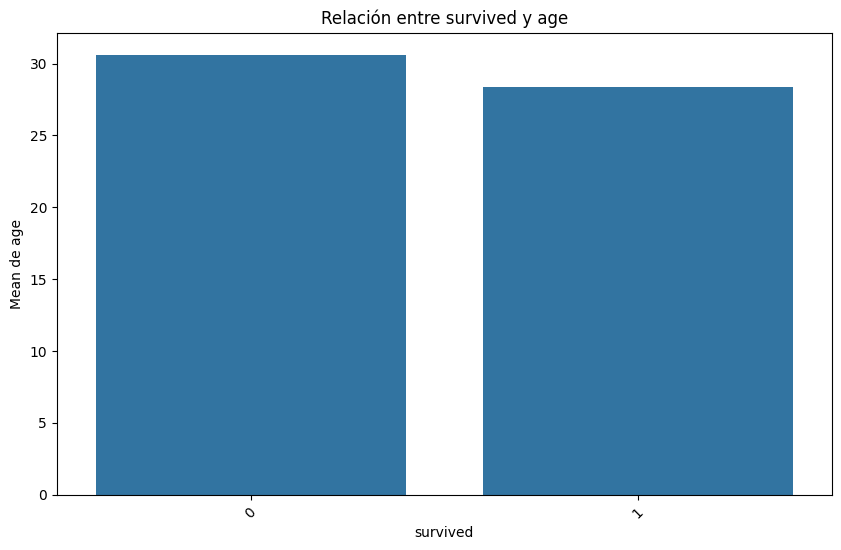

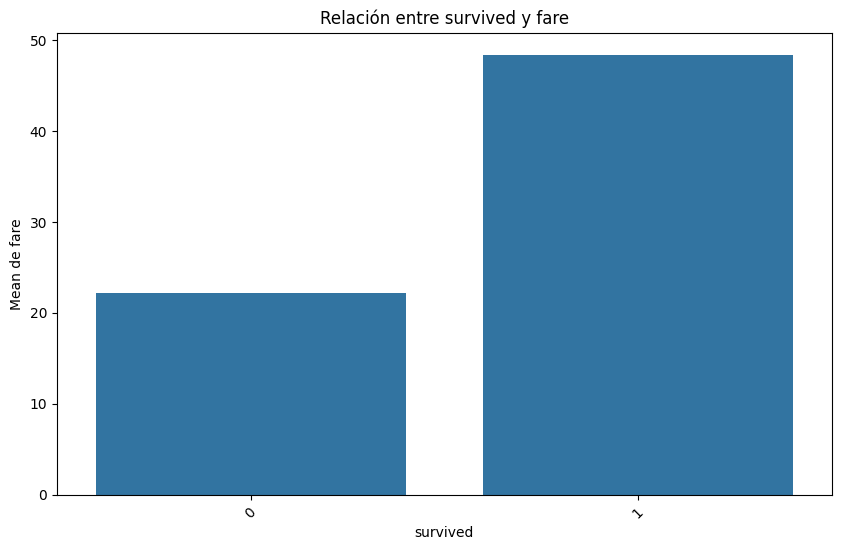

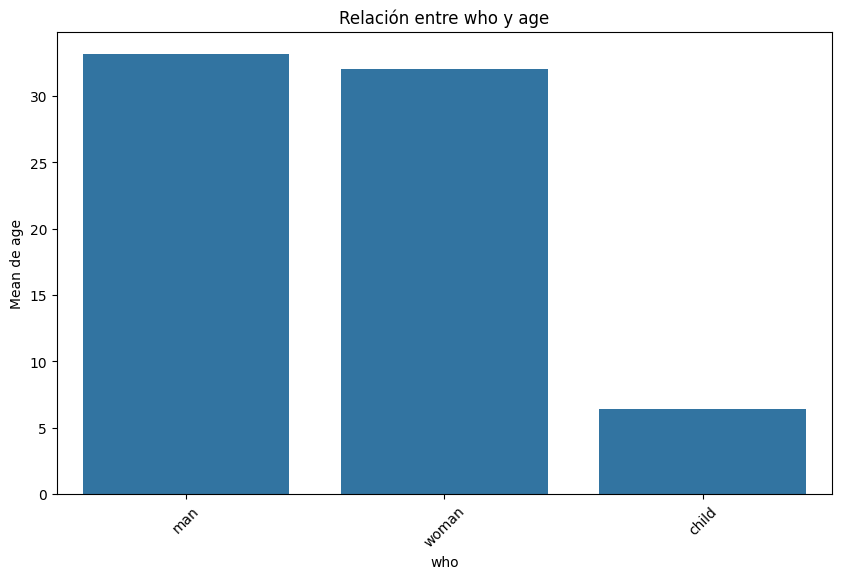

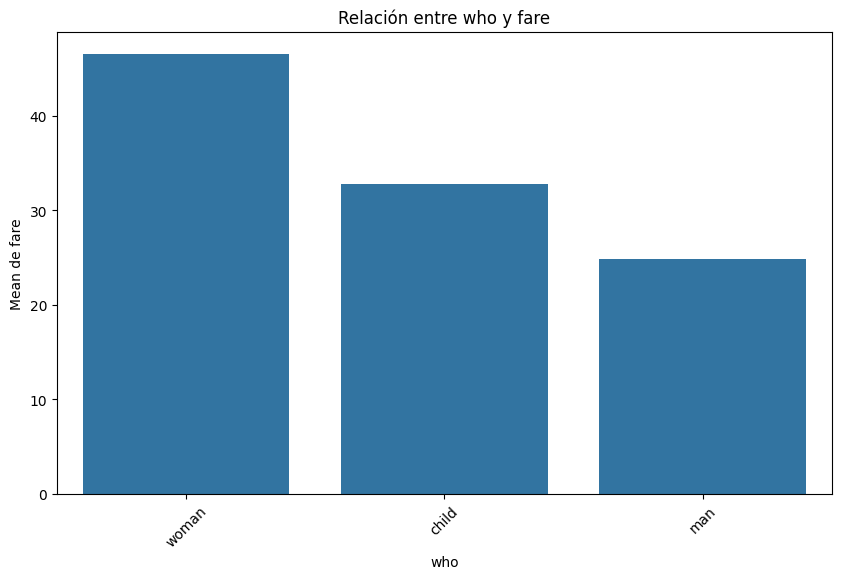

c:\Users\Nur\Documents\GitHub\online_ds_thebridge_Nur\ejercicios\03_Analisis_de_Datos\Sprint_07\Unidad_01\Practica_Obligatoria\bootcampviztools.py:109: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df.groupby(categorical_col)[numerical_col].mean()


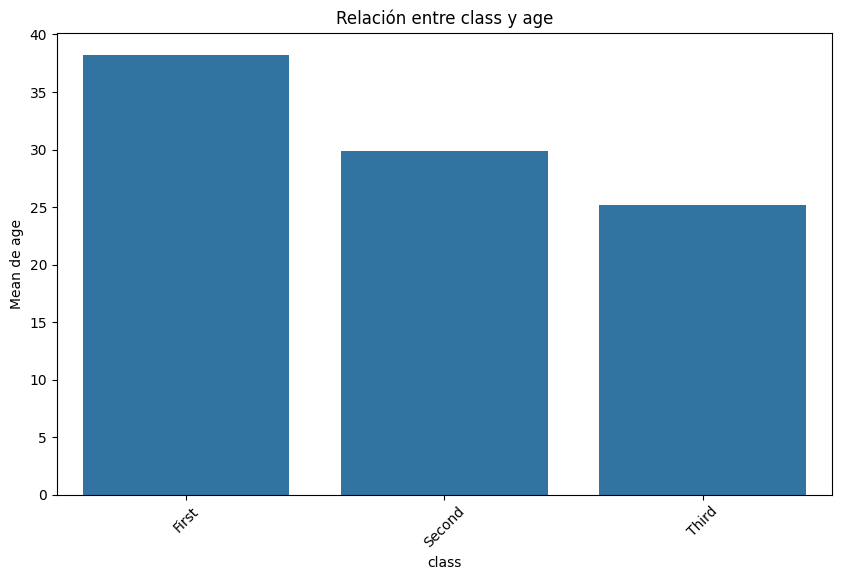

c:\Users\Nur\Documents\GitHub\online_ds_thebridge_Nur\ejercicios\03_Analisis_de_Datos\Sprint_07\Unidad_01\Practica_Obligatoria\bootcampviztools.py:109: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df.groupby(categorical_col)[numerical_col].mean()


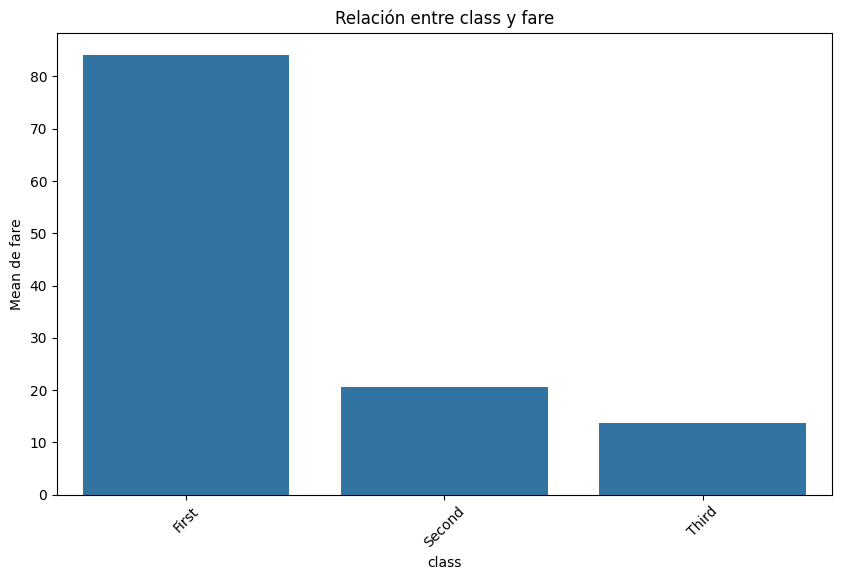

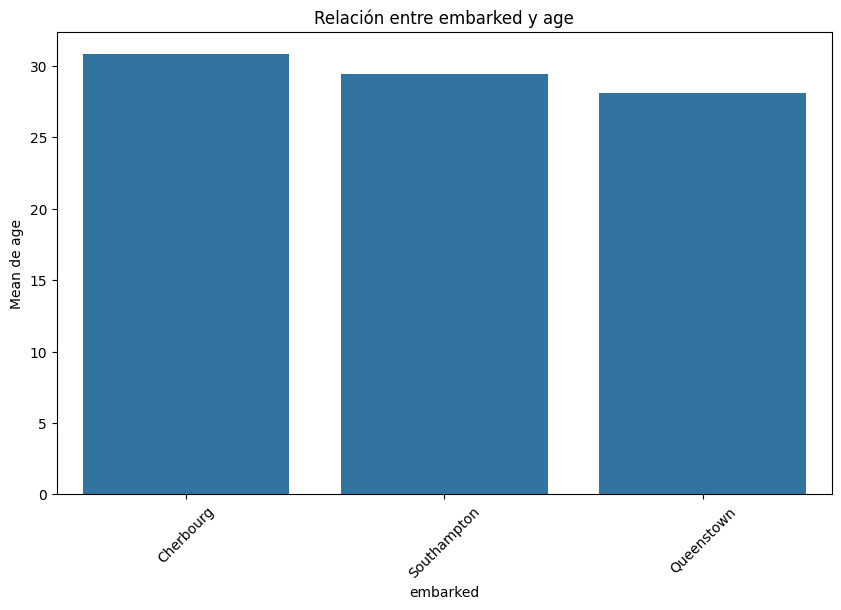

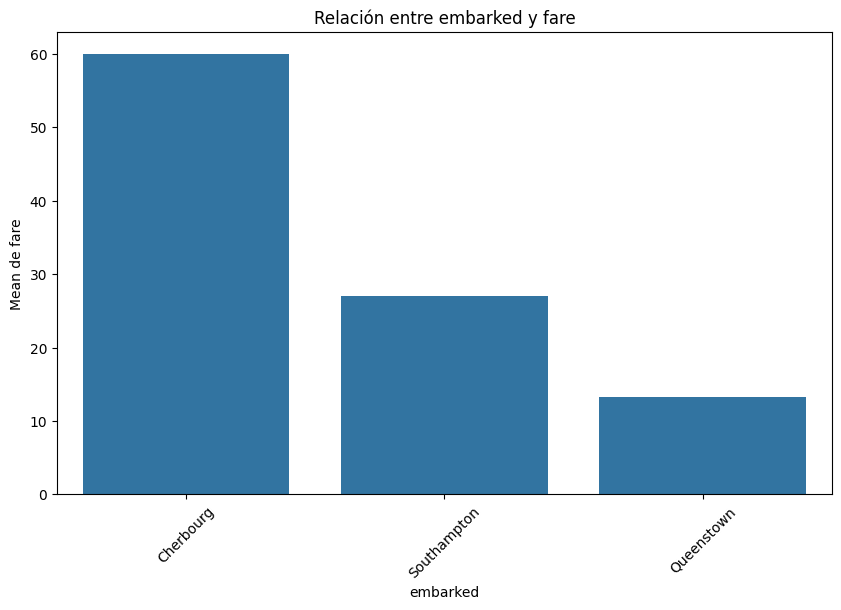

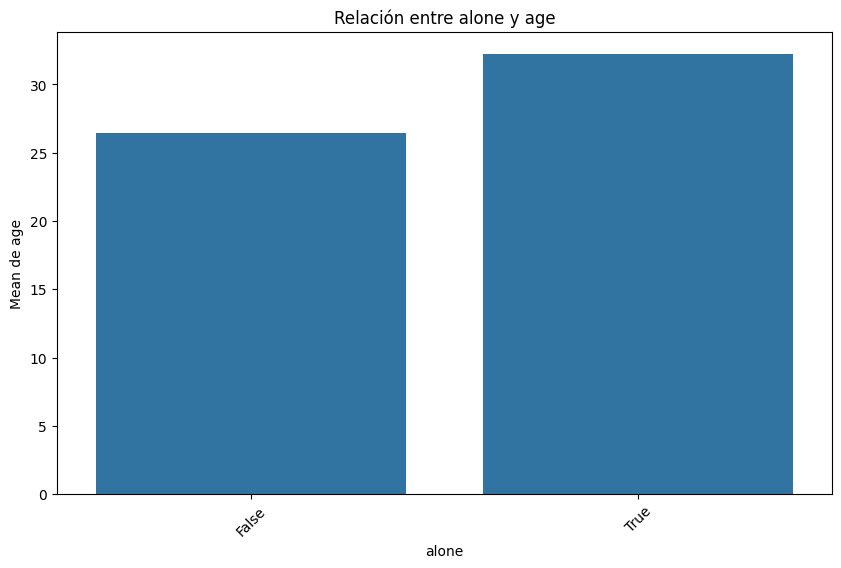

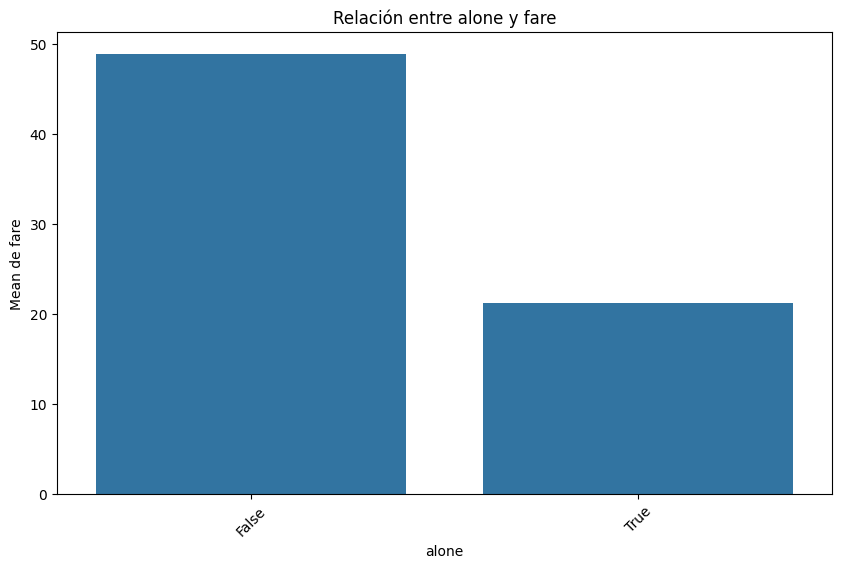

In [70]:
combinaciones = list(itertools.product(lista_categoricas, lista_numericas))

for cat_col, num_col in combinaciones:
    plot_categorical_numerical_relationship(df, cat_col, num_col, show_values=False, measure='mean')


(2, 2)


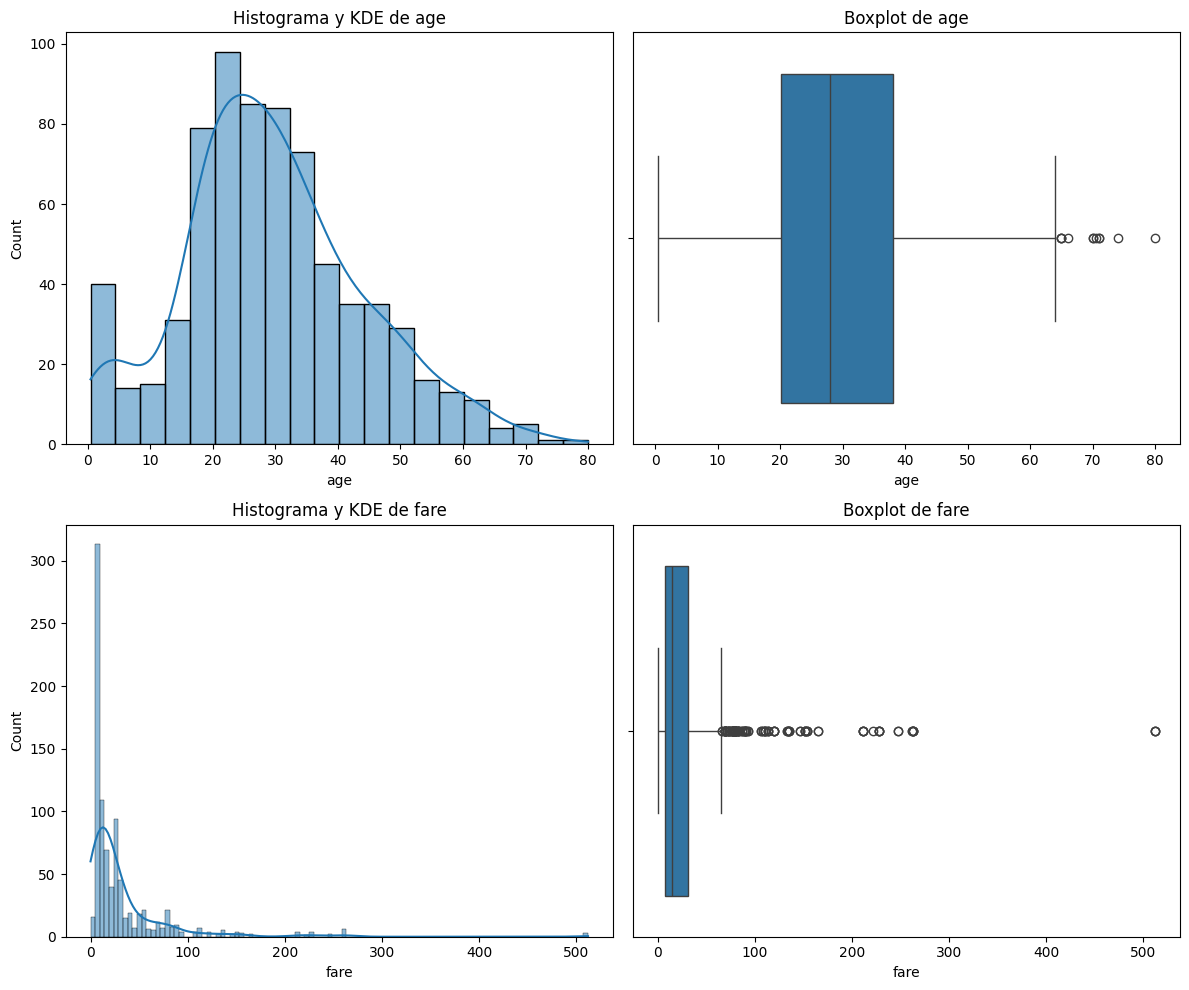

In [71]:
plot_combined_graphs(df_titanic, lista_numericas)

(2,)


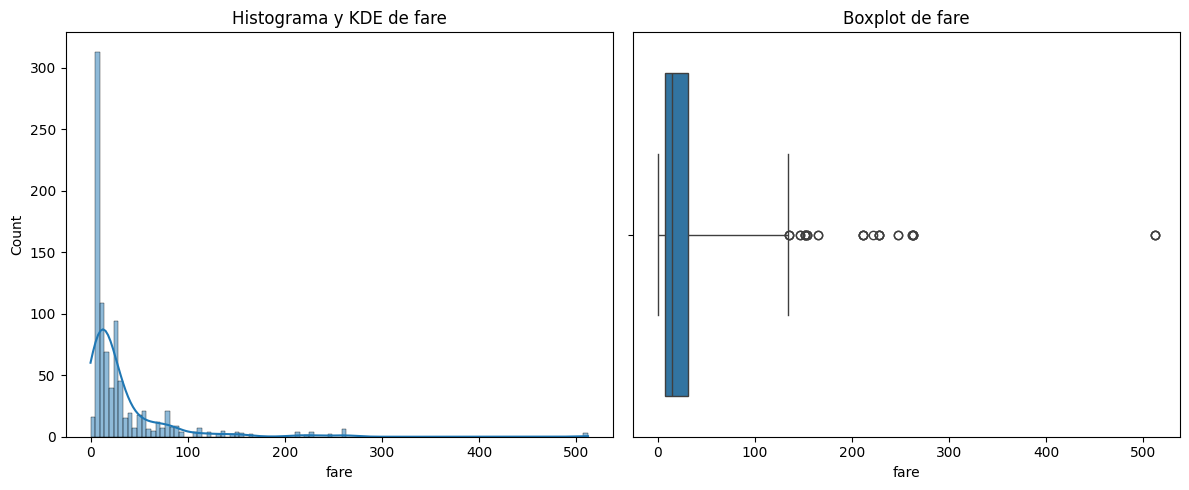

In [73]:
plot_combined_graphs(df_titanic, ["fare"], whisker_width=4.5)